In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('data/ipl/matches.csv')

In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
dataset.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [6]:
dataset.shape

(577, 18)

In [7]:
dataset.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,577.000000,577.000000,577.000000,577.000000,577.000000,0.0
mean,289.000000,2012.029463,0.025997,13.715771,3.363951,NaN
std,166.709828,2.486247,0.159263,23.619282,3.416049,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,145.000000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,289.000000,2012.000000,0.000000,0.000000,3.000000,NaN
75%,433.000000,2014.000000,0.000000,20.000000,6.000000,NaN
max,577.000000,2016.000000,1.000000,144.000000,10.000000,NaN


In [8]:
dataset[dataset['win_by_runs'] > 100]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
55,56,2008,Mumbai,2008-05-30,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,field,normal,0,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium,BF Bowden,RE Koertzen,NaN
236,237,2011,Dharamsala,2011-05-17,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,Kings XI Punjab,111,0,AC Gilchrist,Himachal Pradesh Cricket Association Stadium,Asad Rauf,AM Saheba,NaN
351,352,2013,Bangalore,2013-04-23,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bangalore,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin,NaN
497,498,2015,Bangalore,2015-05-06,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni,NaN
560,561,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma,NaN


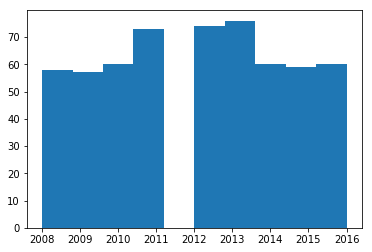

In [9]:
plt.hist(dataset['season'])
plt.show()

In [10]:
import seaborn as sns

# Number of Matches Played Per Season

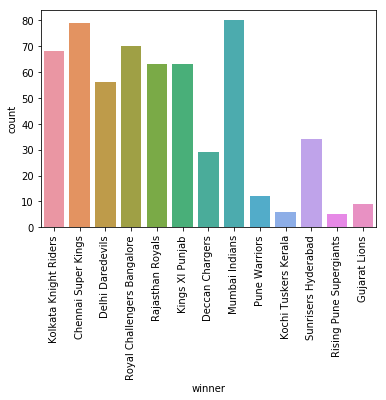

In [12]:
sns.countplot(x = dataset['winner'], data=dataset)
plt.xticks(rotation = 'vertical')
plt.show()

# Number of matches played in each venue

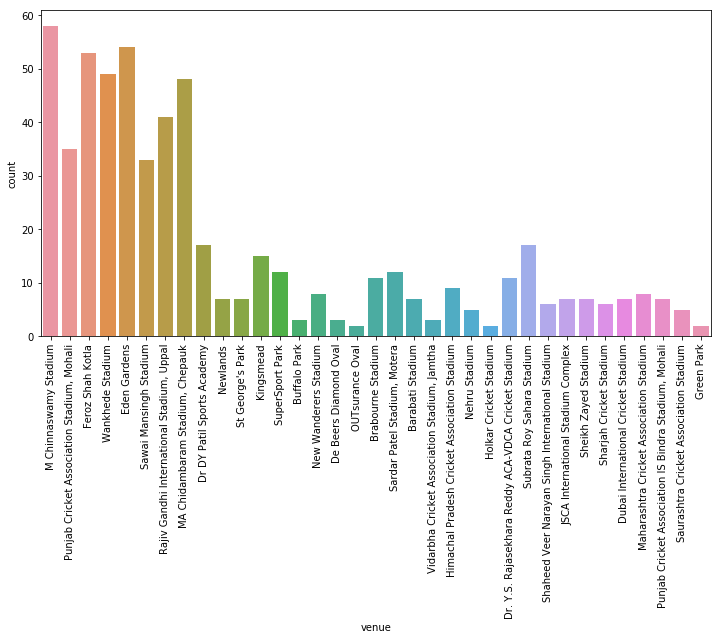

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x = dataset['venue'], data = dataset)
plt.xticks(rotation = 'vertical')
plt.show()

# Number of matches played by each team

In [18]:
temp_df = pd.melt(dataset, id_vars = ['id','season'], 
                  value_vars = ['team1','team2'])

temp_df.head()

,id,season,variable,value
0,1,2008,team1,Kolkata Knight Riders
1,2,2008,team1,Chennai Super Kings
2,3,2008,team1,Rajasthan Royals
3,4,2008,team1,Mumbai Indians
4,5,2008,team1,Deccan Chargers


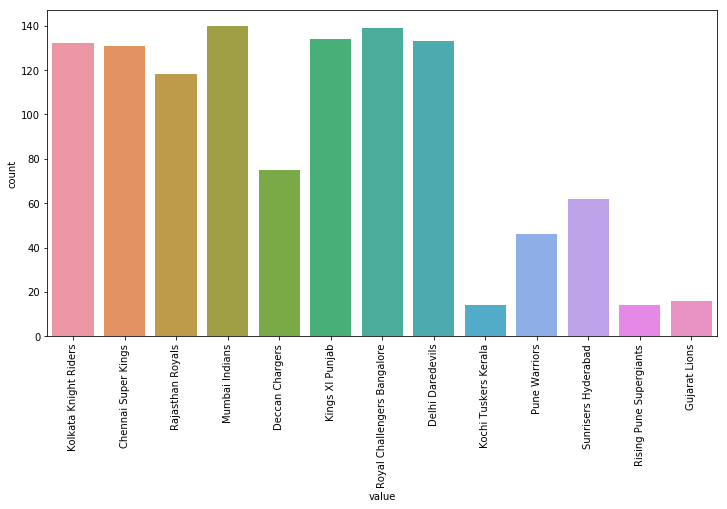

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'value', data = temp_df)
plt.xticks(rotation = 'vertical')
plt.show()

# Winner Per season

In [21]:
dataset.drop_duplicates(subset='season', keep = 'last')[['season', 'winner']]

,season,winner
57,2008,Rajasthan Royals
114,2009,Deccan Chargers
174,2010,Chennai Super Kings
247,2011,Chennai Super Kings
321,2012,Kolkata Knight Riders
397,2013,Mumbai Indians
457,2014,Kolkata Knight Riders
516,2015,Mumbai Indians
576,2016,Sunrisers Hyderabad


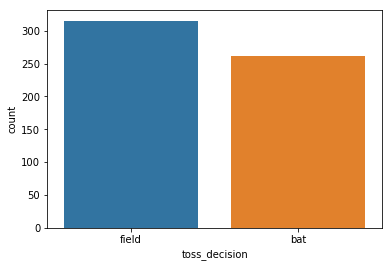

In [22]:
sns.countplot(x = 'toss_decision', data = dataset)
plt.show()

In [24]:
temp_df = dataset.toss_decision.value_counts()
temp_df

field    315
bat      262
Name: toss_decision, dtype: int64

In [26]:
import numpy as np
labels = (np.array(temp_df.index))
labels

array(['field', 'bat'], dtype=object)

In [27]:
size = (np.array(temp_df / temp_df.sum() * 100))
size

array([ 54.59272097,  45.40727903])

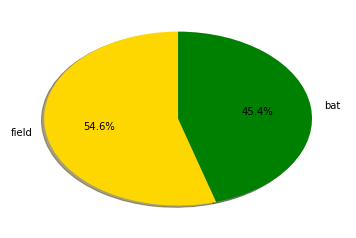

In [33]:
colors = ['gold', 'green']
plt.pie(size, shadow=True, labels = labels, colors=colors, autopct = '%1.1f%%', startangle=90)
plt.show()

# Toss Decision varied over time

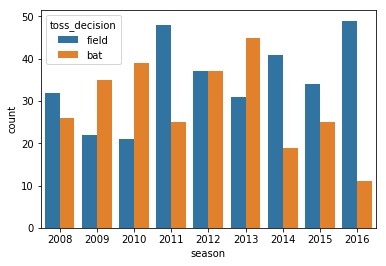

In [34]:
sns.countplot(x = 'season', hue = 'toss_decision', data = dataset)
plt.show()